<a href="https://colab.research.google.com/github/HarshNVyas/ML-Algorithms-Pipeline/blob/main/Modelling_and_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelling and Evaluation

## Introduction

**Modelling in Machine Learning:** Modelling is the process of creating algorithms that can learn from data and make predictions or generate insights.

**Evaluation in Machine Learning:** Evaluation involves assessing how well a model performs its task using various metrics and testing it on new data to ensure it generalizes effectively.

**No Free Lunch Theorem (NFLT):** The No Free Lunch Theorem is a fundamental concept in machine learning. It states that there is `no universally superior machine learning algorithm.` In other words, `no single algorithm performs best for every problem.` The choice of the right algorithm depends on the specific problem, the dataset, and the nature of the data. It highlights the need to experiment with different algorithms and techniques to find the most suitable one for a given task.

In this Google Colab notebook, we will implement various machine learning and data mining techniques, including supervised learning (regression and classification), and unsupervised learning (clustering and association). We will explore different datasets and evaluate the performance of these techniques in various contexts, keeping in mind the No Free Lunch Theorem and the importance of selecting the right tool for the job.

# Supervised Learning

**Supervised Learning:** In supervised learning, the algorithm learns from labeled training data to make predictions or decisions without human intervention. It involves two main subparts:

1. **Classification:** Classification is used when the target variable is categorical or discrete, and the goal is to assign instances to predefined categories or classes. Examples include logistic regression, decision trees, and support vector machines.
2. **Regression:** Regression is used when the target variable is continuous, and the goal is to predict a numeric value. Common algorithms include Linear Regression, Decision Trees, and Random Forests.



**Hyper Parameter tuning:** Hyperparameter tuning is like finding the right settings for a machine learning model to make it work as well as possible. It's like adjusting the dials on a radio until you get the clearest signal. These settings affect how the model learns, and we want to find the best ones to make the model perform its best on a given task. We test different settings, evaluate the model's performance, and keep adjusting until we find the best ones. It's about fine-tuning to get the best results.

## Classification

In this section, we will explore a variety of classification algorithms using the well-known **Iris dataset**. The Iris dataset is a commonly used dataset for educational and practice purposes. We will delve into the following classification algorithms:

1. **Logistic Regression:** Logistic regression is a versatile algorithm used for binary and multiclass classification. It models the probability of an instance belonging to a particular class.

2. **Decision Tree:** Decision trees are tree-like structures that help make decisions or predictions by splitting data into subsets based on certain criteria. They are widely used for classification tasks.

3. **Random Forest Classifier:** The Random Forest is an ensemble learning method that combines multiple decision trees to improve predictive accuracy and reduce overfitting.

4. **Support Vector Machine (SVM):** SVM is a powerful algorithm for binary and multiclass classification. It finds a hyperplane that best separates data into distinct classes.

5. **K-Nearest Neighbors (K-NN):** K-NN is a simple yet effective classification algorithm. It classifies data points based on the majority class of their nearest neighbors.

6. **Naive Bayes:** The Naive Bayes classifier is based on Bayes' theorem and is particularly effective for text classification. It assumes that features are independent, hence the "naive" designation.

Link for dataset: https://www.kaggle.com/datasets/uciml/iris/

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target variable (species)

In [2]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [3]:
y[:5]

array([0, 0, 0, 0, 0])

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train[:5]

array([[4.6, 3.6, 1. , 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.7, 3.1, 4.4, 1.4],
       [4.8, 3.4, 1.6, 0.2],
       [4.4, 3.2, 1.3, 0.2]])

In [5]:
y_test[:5]

array([1, 0, 2, 1, 1])

### Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter=500).fit(X_train, y_train)

In [7]:
from sklearn.metrics import accuracy_score
pred = LR.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print(f'The accuracy for Logistic Regression with max_iter = 500 : {accuracy*100:0.2f} %')

The accuracy for Logistic Regression with max_iter = 500 : 100.00 %


The other way to write the code same as:

`pred = LR.predict(X_test)
accuracy = accuracy_score(y_test, pred)`

insted we can use:

In [8]:
LR.score(X_test, y_test)

1.0

#### K fold Cross Validation

K-Fold Cross-Validation is a technique used to assess a machine learning model's performance by dividing the dataset into K subsets (folds) and repeatedly training and testing the model on different combinations of these subsets. In your code, `k` is set to 5, indicating 5-fold cross-validation. The `cross_val_score` function automatically handles the process, providing an array of evaluation scores to gauge the model's performance. This method helps reduce the impact of randomness in a single train-test split, offering a more reliable estimate of the model's generalization ability.


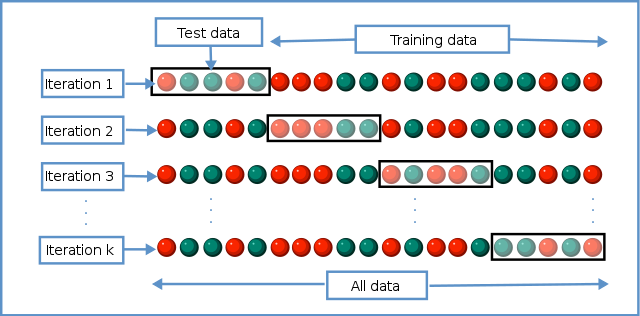

https://commons.wikimedia.org/wiki/File:K-fold_cross_validation_EN.svg


In [9]:
from sklearn.model_selection import cross_val_score

k = 5
cross_val_score(LR, X, y, cv=k)

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

#### Confusion Metrics

The confusion matrix is a table used to assess the performance of a classification model. It includes four categories:

1. **True Positives (TP)**: Correctly predicted positive cases.
2. **True Negatives (TN)**: Correctly predicted negative cases.
3. **False Positives (FP)**: Incorrectly predicted positive cases.
4. **False Negatives (FN)**: Incorrectly predicted negative cases.
These elements help in evaluating a model's accuracy, precision, recall, and other performance metrics.

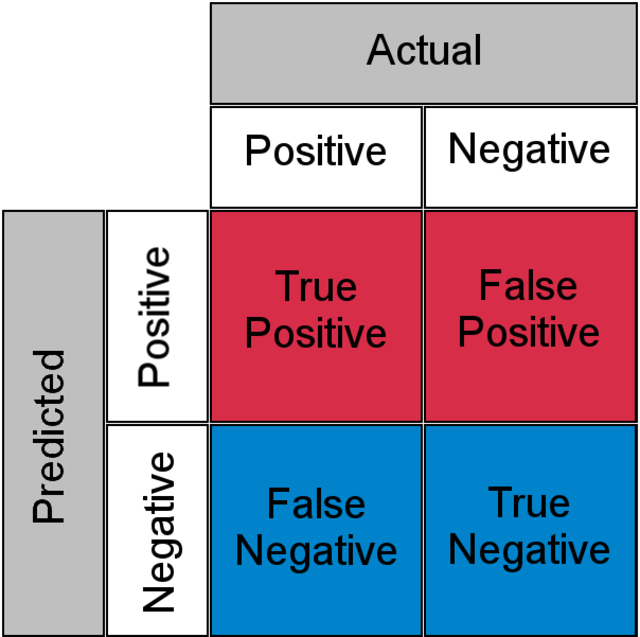

https://commons.wikimedia.org/wiki/File:ConfusionMatrixRedBlue.png

In [10]:
from sklearn.metrics import confusion_matrix

y_pred = LR.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

**NOTE:** The `roc_curve` function in scikit-learn is primarily designed for **binary classification** and calculates the **Receiver Operating Characteristic (ROC)** curve for binary classification problems. It cannot be used directly for multiclass classification.In our case, `roc_curve` can not be used for evaluation because our problem is multiclass classification.

In [11]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [12]:
def LogisticReg(n_iter):
  LR = LogisticRegression(max_iter=n_iter).fit(X_train, y_train)
  pred = LR.predict(X_test)
  accuracy = accuracy_score(y_test, pred)
  print(f'Accuracy for max_iter = {n_iter} : {accuracy*100:0.2f} %')

print('Logistic Regression:')
for n_iter in range (100, 1000, 100):
  LogisticReg(n_iter)

Logistic Regression:
Accuracy for max_iter = 100 : 100.00 %
Accuracy for max_iter = 200 : 100.00 %
Accuracy for max_iter = 300 : 100.00 %
Accuracy for max_iter = 400 : 100.00 %
Accuracy for max_iter = 500 : 100.00 %
Accuracy for max_iter = 600 : 100.00 %
Accuracy for max_iter = 700 : 100.00 %
Accuracy for max_iter = 800 : 100.00 %
Accuracy for max_iter = 900 : 100.00 %


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)

In [14]:
from sklearn.metrics import accuracy_score
pred = DT.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print(f'The accuracy for Decision Tree : {accuracy*100:0.2f} %')

The accuracy for Decision Tree : 100.00 %


In [15]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Random Forest Classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)

In [17]:
from sklearn.metrics import accuracy_score
pred = RF.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print(f'The accuracy for Random Forest : {accuracy*100:0.2f} %')

The accuracy for Random Forest : 100.00 %


In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [19]:
def RandomFor(n_est):
  RF = RandomForestClassifier(n_estimators=n_est, random_state=42).fit(X_train, y_train)
  pred = RF.predict(X_test)
  accuracy = accuracy_score(y_test, pred)
  print(f'Accuracy for n_estimators = {n_est} : {accuracy*100:0.2f} %')

print('Random Forest Classifier:')
for n_est in range (100, 1000, 100):
  RandomFor(n_est)

Random Forest Classifier:
Accuracy for n_estimators = 100 : 100.00 %
Accuracy for n_estimators = 200 : 100.00 %
Accuracy for n_estimators = 300 : 100.00 %
Accuracy for n_estimators = 400 : 100.00 %
Accuracy for n_estimators = 500 : 100.00 %
Accuracy for n_estimators = 600 : 100.00 %
Accuracy for n_estimators = 700 : 100.00 %
Accuracy for n_estimators = 800 : 100.00 %
Accuracy for n_estimators = 900 : 100.00 %


### Support Vector Machine (SVM)

In [20]:
from sklearn.svm import SVC

SV = SVC(random_state=42).fit(X_train, y_train)

In [21]:
from sklearn.metrics import accuracy_score
pred = SV.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print(f'The accuracy for Support Vector Machine : {accuracy*100:0.2f} %')

The accuracy for Support Vector Machine : 100.00 %


In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### K-Nearest Neighbours

In [23]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)

In [24]:
from sklearn.metrics import accuracy_score
pred = KNN.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print(f'The accuracy for K-nearest Neighbours for k = 5 : {accuracy*100:0.2f} %')

The accuracy for K-nearest Neighbours for k = 5 : 96.67 %


In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [26]:
def KNear(n_neighbors):
  KNN = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
  pred = KNN.predict(X_test)
  accuracy = accuracy_score(y_test, pred)
  print(f'Accuracy for K = {n_neighbors} : {accuracy*100:0.2f} %')

print('K Nearest Neighbours:')
for n_neighbors in range (1, 10):
  KNear(n_neighbors)

K Nearest Neighbours:
Accuracy for K = 1 : 100.00 %
Accuracy for K = 2 : 100.00 %
Accuracy for K = 3 : 100.00 %
Accuracy for K = 4 : 100.00 %
Accuracy for K = 5 : 100.00 %
Accuracy for K = 6 : 100.00 %
Accuracy for K = 7 : 96.67 %
Accuracy for K = 8 : 100.00 %
Accuracy for K = 9 : 100.00 %


### Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB

NB =  GaussianNB().fit(X_train, y_train)

In [28]:
from sklearn.metrics import accuracy_score
pred = NB.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print(f'The accuracy for Naive Bayes : {accuracy*100:0.2f} %')

The accuracy for Naive Bayes : 100.00 %


In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



All the models for classification in One Code

In [30]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize classifiers for each algorithm
logistic_reg = LogisticRegression(max_iter=1000)
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svm_classifier = SVC()
knn_classifier = KNeighborsClassifier()
naive_bayes = GaussianNB()

# Define a list of classifiers for iteration
classifiers = [
    ("Logistic Regression", logistic_reg),
    ("Decision Tree", decision_tree),
    ("Random Forest", random_forest),
    ("Support Vector Machine", svm_classifier),
    ("K-Nearest Neighbors", knn_classifier),
    ("Naive Bayesian", naive_bayes)
]

# Iterate through classifiers, fit, predict, and evaluate
for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Algorithm: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("--------------------------------------------------")


Algorithm: Logistic Regression
Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

--------------------------------------------------
Algorithm: Decision Tree
Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

--------------------------------------------------
Al

Saving the models

## Regression

In this section, we will comprehensively explore a range of regression algorithms using the **California housing dataset**. This dataset provides a real-world scenario to apply regression techniques. Our focus will be on the following regression algorithms:

1. **Linear Regression:** Linear regression is a fundamental algorithm for predicting numerical values (continuous variables) by fitting a linear equation to the observed data. It is a simple yet powerful method widely used for regression tasks.

2. **Support Vector Regressor (SVR):** Support Vector Regression is a regression technique that employs the principles of support vector machines. It is particularly effective for tasks where there may not be a linear relationship between the features and the target variable.

3. **Random Forest Regressor:** The Random Forest Regressor is an ensemble learning algorithm that combines multiple decision trees to make predictions. It is known for its robustness, versatility, and ability to handle complex regression tasks.

Link for dataset: https://www.kaggle.com/datasets/shibumohapatra/house-price

In [31]:
from sklearn.datasets import fetch_california_housing

# Load the California Housing Prices dataset
california_housing = fetch_california_housing()

# Access the data and target
X = california_housing.data
y = california_housing.target
X[:5]

array([[ 8.32520000e+00,  4.10000000e+01,  6.98412698e+00,
         1.02380952e+00,  3.22000000e+02,  2.55555556e+00,
         3.78800000e+01, -1.22230000e+02],
       [ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
         9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
         3.78600000e+01, -1.22220000e+02],
       [ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00,
         1.07344633e+00,  4.96000000e+02,  2.80225989e+00,
         3.78500000e+01, -1.22240000e+02],
       [ 5.64310000e+00,  5.20000000e+01,  5.81735160e+00,
         1.07305936e+00,  5.58000000e+02,  2.54794521e+00,
         3.78500000e+01, -1.22250000e+02],
       [ 3.84620000e+00,  5.20000000e+01,  6.28185328e+00,
         1.08108108e+00,  5.65000000e+02,  2.18146718e+00,
         3.78500000e+01, -1.22250000e+02]])

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train[:5]

array([[ 3.25960000e+00,  3.30000000e+01,  5.01765650e+00,
         1.00642055e+00,  2.30000000e+03,  3.69181380e+00,
         3.27100000e+01, -1.17030000e+02],
       [ 3.81250000e+00,  4.90000000e+01,  4.47354497e+00,
         1.04100529e+00,  1.31400000e+03,  1.73809524e+00,
         3.37700000e+01, -1.18160000e+02],
       [ 4.15630000e+00,  4.00000000e+00,  5.64583333e+00,
         9.85119048e-01,  9.15000000e+02,  2.72321429e+00,
         3.46600000e+01, -1.20480000e+02],
       [ 1.94250000e+00,  3.60000000e+01,  4.00281690e+00,
         1.03380282e+00,  1.41800000e+03,  3.99436620e+00,
         3.26900000e+01, -1.17110000e+02],
       [ 3.55420000e+00,  4.30000000e+01,  6.26842105e+00,
         1.13421053e+00,  8.74000000e+02,  2.30000000e+00,
         3.67800000e+01, -1.19800000e+02]])

In [33]:
y_train[:5]

array([1.03 , 3.821, 1.726, 0.934, 0.965])

### Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression().fit(X_train, y_train)

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

pred = LR.predict(X_test)

mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f"Algorithm: Linear Regression")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Algorithm: Linear Regression
Mean Squared Error (MSE): 0.56
Mean Absolute Error (MAE): 0.53
R-squared (R2) Score: 0.58


### Support Vector Reggressor

In [36]:
from sklearn.svm import SVR

SV = SVR().fit(X_train, y_train)

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

pred = SV.predict(X_test)

mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f"Algorithm: Support Vector Regressor")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Algorithm: Support Vector Regressor
Mean Squared Error (MSE): 1.33
Mean Absolute Error (MAE): 0.86
R-squared (R2) Score: -0.02


### Random Forest Regressor

In [38]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

pred = RF.predict(X_test)

mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print("Algorithm: Random Forest Regressor")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Algorithm: Random Forest Regressor
Mean Squared Error (MSE): 0.26
Mean Absolute Error (MAE): 0.33
R-squared (R2) Score: 0.81


All in one Code for Regression Algorithms

In [40]:
# Import necessary libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the California Housing Prices dataset
california_housing = fetch_california_housing()
X, y = california_housing.data, california_housing.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize regression models
linear_reg = LinearRegression()
svr_reg = SVR()
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Define a list of regressors for iteration
regressors = [
    ("Linear Regression", linear_reg),
    ("Support Vector Regressor", svr_reg),
    ("Random Forest Regressor", rf_reg)
]

# Iterate through regressors, fit, predict, and evaluate
for name, regressor in regressors:
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Algorithm: {name}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R-squared (R2) Score: {r2:.2f}")
    print("--------------------------------------------------")

Algorithm: Linear Regression
Mean Squared Error (MSE): 0.56
Mean Absolute Error (MAE): 0.53
R-squared (R2) Score: 0.58
--------------------------------------------------
Algorithm: Support Vector Regressor
Mean Squared Error (MSE): 1.33
Mean Absolute Error (MAE): 0.86
R-squared (R2) Score: -0.02
--------------------------------------------------
Algorithm: Random Forest Regressor
Mean Squared Error (MSE): 0.26
Mean Absolute Error (MAE): 0.33
R-squared (R2) Score: 0.81
--------------------------------------------------


## Improving the  model (Hyperparameter Tuning)

Hyperparameters are essential configuration settings for machine learning models that are not learned from the data but are set before the training process begins. They play a crucial role in determining the model's performance and behavior. Properly tuning these hyperparameters is crucial for optimizing a model's performance. Let's briefly discuss the need to tune hyperparameters in reference to the provided text and code.

There are three methods for hyperparameter tuning in Python:

1. **Manually Trying out different parameters:** This involves manually selecting and trying different hyperparameter values and assessing the model's performance. It's a time-consuming and often inefficient approach but can be useful for understanding the impact of hyperparameters on the model's performance.

2. **RandomizedSearchCV:** RandomizedSearchCV is a technique that automates the hyperparameter tuning process by searching through a predefined range of hyperparameters. It randomly samples a subset of the hyperparameter space and evaluates the model's performance, making it more efficient than manual tuning. This method helps find good hyperparameters without trying every possible combination.

3. **GridSearchCV:** GridSearchCV is another automated hyperparameter tuning technique that systematically explores all possible combinations of hyperparameters within predefined ranges. While it's more comprehensive and thorough than RandomizedSearchCV, it can be computationally expensive for a large hyperparameter space.

The code `Model.get_params()` shows the hyperparameters for a given model. For example: The code below shows hyperparameters for Random Forest Regressor.

In [41]:
RF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

the method`evaluate` will print and return metric parameters.

In [42]:
def evaluate(y_test, pred):
  mse = mean_squared_error(y_test, pred)
  mae = mean_absolute_error(y_test, pred)
  r2 = r2_score(y_test, pred)
  print(f"Mean Squared Error (MSE): {mse:.2f}")
  print(f"Mean Absolute Error (MAE): {mae:.2f}")
  print(f"R-squared (R2) Score: {r2:.2f}")
  return mse, mae, r2

### Manually testing hyperparameters

In [43]:
def RForR(n_est):
  RF = RandomForestRegressor(n_estimators=n_est, random_state=42).fit(X_train, y_train)
  pred = RF.predict(X_test)
  mse = mean_squared_error(y_test, pred)
  mae = mean_absolute_error(y_test, pred)
  r2 = r2_score(y_test, pred)
  print(f"Number of Estimators = {n_est}")
  print(f"Mean Squared Error (MSE): {mse:.2f}")
  print(f"Mean Absolute Error (MAE): {mae:.2f}")
  print(f"R-squared (R2) Score: {r2:.2f}")
  print("--------------------------------------------------")

print("Algorithm: Random Forest Regressor")
for n_est in range (100, 1000, 100):
  RForR(n_est)

Algorithm: Random Forest Regressor
Number of Estimators = 100
Mean Squared Error (MSE): 0.26
Mean Absolute Error (MAE): 0.33
R-squared (R2) Score: 0.81
--------------------------------------------------
Number of Estimators = 200
Mean Squared Error (MSE): 0.25
Mean Absolute Error (MAE): 0.33
R-squared (R2) Score: 0.81
--------------------------------------------------
Number of Estimators = 300
Mean Squared Error (MSE): 0.25
Mean Absolute Error (MAE): 0.33
R-squared (R2) Score: 0.81
--------------------------------------------------
Number of Estimators = 400
Mean Squared Error (MSE): 0.25
Mean Absolute Error (MAE): 0.33
R-squared (R2) Score: 0.81
--------------------------------------------------
Number of Estimators = 500
Mean Squared Error (MSE): 0.25
Mean Absolute Error (MAE): 0.33
R-squared (R2) Score: 0.81
--------------------------------------------------
Number of Estimators = 600
Mean Squared Error (MSE): 0.25
Mean Absolute Error (MAE): 0.33
R-squared (R2) Score: 0.81
--------

In [44]:
manual_metric = evaluate(y_test, pred)

Mean Squared Error (MSE): 0.26
Mean Absolute Error (MAE): 0.33
R-squared (R2) Score: 0.81


### RandimizedSearchCV

In [45]:
grid = {'n_estimators':[100,200,500,800,1000,1500],
        'max_depth':[None, 10, 30],
        'max_features':[1.0, 'sqrt'],
        'min_samples_split':[2,4,8],
        'min_samples_leaf':[1,2,4]}
grid

{'n_estimators': [100, 200, 500, 800, 1000, 1500],
 'max_depth': [None, 10, 30],
 'max_features': [1.0, 'sqrt'],
 'min_samples_split': [2, 4, 8],
 'min_samples_leaf': [1, 2, 4]}

In [46]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

np.random.seed(42)

rs_RF = RandomizedSearchCV(estimator=RF,
                           param_distributions=grid,
                           n_iter=15,
                           cv=5)

rs_RF.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=15,
                   param_distributions={'max_depth': [None, 10, 30],
                                        'max_features': [1.0, 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 8],
                                        'n_estimators': [100, 200, 500, 800,
                                                         1000, 1500]})

In [47]:
rs_RF.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 1.0,
 'max_depth': 30}

In [48]:
rs_metric = evaluate(y_test, rs_RF.predict(X_test))

Mean Squared Error (MSE): 0.25
Mean Absolute Error (MAE): 0.32
R-squared (R2) Score: 0.81


### GridSearchCV

In [49]:
grid_2 = {'n_estimators':[100,200,500],
        'max_depth':[None],
        'max_features':[1.0, 'sqrt'],
        'min_samples_split':[6],
        'min_samples_leaf':[1,2]}
grid

{'n_estimators': [100, 200, 500, 800, 1000, 1500],
 'max_depth': [None, 10, 30],
 'max_features': [1.0, 'sqrt'],
 'min_samples_split': [2, 4, 8],
 'min_samples_leaf': [1, 2, 4]}

In [50]:
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

gs_RF = GridSearchCV(estimator=RF,
                     param_grid=grid_2,
                     cv=5)

gs_RF.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None], 'max_features': [1.0, 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]})

In [51]:
gs_RF.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 500}

In [52]:
gs_metric = evaluate(y_test, gs_RF.predict(X_test))

Mean Squared Error (MSE): 0.25
Mean Absolute Error (MAE): 0.33
R-squared (R2) Score: 0.81


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


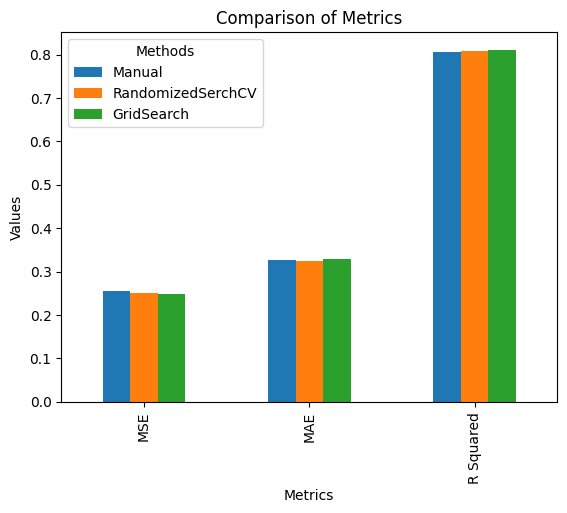

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

metrics = pd.DataFrame({'Manual':manual_metric,
                        'RandomizedSerchCV':rs_metric,
                        'GridSearch':gs_metric})
ax = metrics.plot(kind='bar')

labels = ['MSE', 'MAE', 'R Squared']

# Set the x-axis labels
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)

ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Comparison of Metrics')
ax.legend(title='Methods')

# Unsupervised Learning

**Unsupervised Learning:** In unsupervised learning, the algorithm is given data without explicit instructions on what to do with it. It aims to discover patterns, relationships, or structures within the data. Common subparts include:

1. **Clustering:** Clustering algorithms group similar data points together. K-Means, Hierarchical Clustering, and DBSCAN are commonly used for clustering.

2. **Association:** Association rule mining focuses on discovering patterns in data, particularly in transactional databases. It identifies relationships between items, such as market basket analysis, which helps in understanding customer behavior and product associations.

3. **Topic Modeling:** Topic modeling is a subfield of unsupervised learning, primarily used in natural language processing (NLP). It involves the discovery of topics within a collection of documents. Latent Dirichlet Allocation (LDA) and Non-Negative Matrix Factorization (NMF) are popular algorithms for topic modeling. **(Not Covered)**

**NOTE:** In unsupervised learning, there are no target labels or features because the model learns solely from the data itself.

## Clusturing

In our quest for learning and understanding clustering algorithms, we will explore and apply these techniques to the **Mall Customer Segmentation Data dataset**. This dataset offers valuable insights into customer behavior and preferences. Our objective is to unravel patterns and group customers into meaningful segments using the following clustering algorithms:

1. **K-Means Clustering:** K-Means is one of the most popular and intuitive clustering methods. It aims to partition the dataset into K distinct, non-overlapping clusters, where each data point belongs to the cluster with the nearest mean. K-Means is known for its simplicity and efficiency.

2. **Hierarchical Clustering:** Hierarchical clustering creates a tree of clusters, also known as a dendrogram. It allows us to explore relationships at multiple levels of granularity. We can cut the dendrogram at different heights to obtain different numbers of clusters. This technique is excellent for visualizing the hierarchy of data.

3. **DBScan (Density-Based Spatial Clustering of Applications with Noise):** DBScan is a density-based clustering algorithm. It groups data points based on their density, which allows for the discovery of clusters of arbitrary shapes. DBScan is particularly useful when dealing with clusters of varying sizes and irregular shapes.

Link for dataset: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [55]:
import pandas as pd

df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


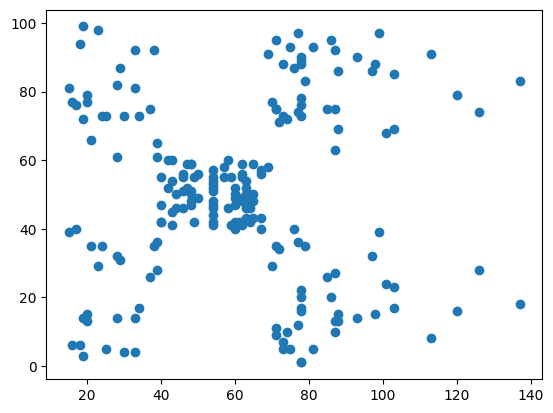

In [56]:
import matplotlib.pyplot as plt

X = df[['Annual Income (k$)','Spending Score (1-100)']]
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'])

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

### K-Means Clustering

In [58]:
from sklearn.cluster import KMeans

KM = KMeans(n_clusters=3, random_state=42)

In [59]:
from sklearn.metrics import silhouette_score

labels = KM.fit_predict(X_scaled)
score = silhouette_score(X_scaled, labels)
print(f"K-Means Silhouette Score: {score:.2f}")

K-Means Silhouette Score: 0.47


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


We can eliminate any intervening warnings in the output snippet by utilizing the following code:

In [60]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

This code snippet effectively suppresses any warnings that might appear during program execution, ensuring a cleaner and more focused output.

In [61]:
def kmeans(n_clusters):
  KM = KMeans(n_clusters=n_clusters, random_state=42,)
  labels = KM.fit_predict(X_scaled)
  score = silhouette_score(X_scaled, labels)
  print(f"Score for {n_clusters} clusters : {score:.2f}")

print("Algorithm: K Means")
for n_clusters in range (2, 11):
  kmeans(n_clusters)

Algorithm: K Means
Score for 2 clusters : 0.31
Score for 3 clusters : 0.47
Score for 4 clusters : 0.49
Score for 5 clusters : 0.55
Score for 6 clusters : 0.54
Score for 7 clusters : 0.53
Score for 8 clusters : 0.46
Score for 9 clusters : 0.46
Score for 10 clusters : 0.45


### Hierarchical Clusturing

In [62]:
from sklearn.cluster import AgglomerativeClustering

HC = AgglomerativeClustering(n_clusters=3)

In [63]:
from sklearn.metrics import silhouette_score

labels = HC.fit_predict(X_scaled)
score = silhouette_score(X_scaled, labels)
print(f"Hierarchical Silhouette Score: {score:.2f}")

Hierarchical Silhouette Score: 0.46


In [64]:
def Hierarchical(n_clusters):
  HC = AgglomerativeClustering(n_clusters=n_clusters)
  labels = HC.fit_predict(X_scaled)
  score = silhouette_score(X_scaled, labels)
  print(f"Score for {n_clusters} clusters : {score:.2f}")

print("Algorithm: Hierarchical Clustering")
for n_clusters in range (2, 11):
  Hierarchical(n_clusters)

Algorithm: Hierarchical Clustering
Score for 2 clusters : 0.38
Score for 3 clusters : 0.46
Score for 4 clusters : 0.49
Score for 5 clusters : 0.55
Score for 6 clusters : 0.54
Score for 7 clusters : 0.52
Score for 8 clusters : 0.43
Score for 9 clusters : 0.44
Score for 10 clusters : 0.43


### DBSCAN

In [65]:
from sklearn.cluster import DBSCAN

DB = DBSCAN(eps=0.5, min_samples=5)

In [66]:
from sklearn.metrics import silhouette_score

labels = DB.fit_predict(X_scaled)
score = silhouette_score(X_scaled, labels)
print(f"DBScan Silhouette Score: {score:.2f}")

DBScan Silhouette Score: 0.35


In [67]:
def dbscan(samples):
  DB = DBSCAN(eps=0.5, min_samples=samples)
  labels = DB.fit_predict(X_scaled)
  score = silhouette_score(X_scaled, labels)
  print(f"Score for {samples} min_samples : {score:.2f}")

print("Algorithm: DBScan Clustering")
for samples in range (2, 11):
  dbscan(samples)

Algorithm: DBScan Clustering
Score for 2 min_samples : 0.27
Score for 3 min_samples : 0.36
Score for 4 min_samples : 0.35
Score for 5 min_samples : 0.35
Score for 6 min_samples : 0.36
Score for 7 min_samples : 0.35
Score for 8 min_samples : 0.35
Score for 9 min_samples : 0.32
Score for 10 min_samples : 0.41


All in one code for Clusturing Algorithms

K-Means Silhouette Score: 0.55
Hierarchical Silhouette Score: 0.55
DBSCAN Silhouette Score: 0.41


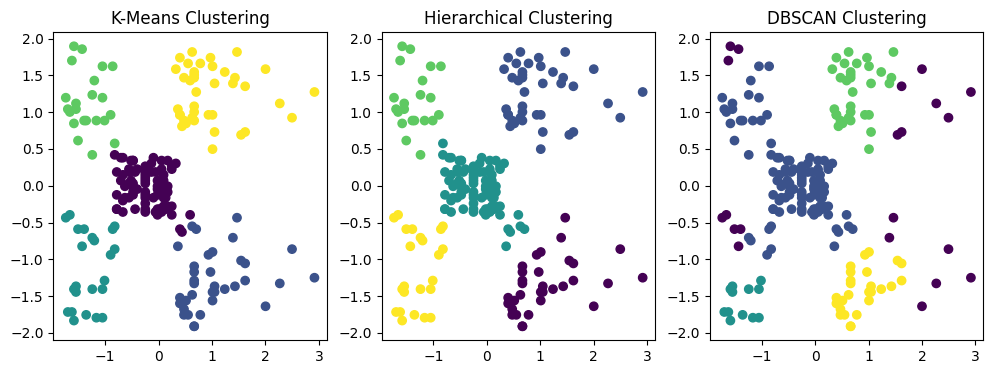

In [68]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load the Mall Customer Segmentation Data dataset (replace with the actual file path)
data = pd.read_csv("Mall_Customers.csv")

# Select features for clustering (e.g., Annual Income and Spending Score)
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize clustering models
kmeans = KMeans(n_clusters=5, random_state=42)
hierarchical = AgglomerativeClustering(n_clusters=5)
dbscan = DBSCAN(eps=0.5, min_samples=10)

# Fit the models to the data
kmeans_labels = kmeans.fit_predict(X_scaled)
hierarchical_labels = hierarchical.fit_predict(X_scaled)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Evaluate clustering using Silhouette Score
kmeans_score = silhouette_score(X_scaled, kmeans_labels)
hierarchical_score = silhouette_score(X_scaled, hierarchical_labels)
dbscan_score = silhouette_score(X_scaled, dbscan_labels)

print(f"K-Means Silhouette Score: {kmeans_score:.2f}")
print(f"Hierarchical Silhouette Score: {hierarchical_score:.2f}")
print(f"DBSCAN Silhouette Score: {dbscan_score:.2f}")

# Plot the clustering results
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')

plt.subplot(132)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title('Hierarchical Clustering')

plt.subplot(133)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')

plt.show()

## Association

In our exploration of association algorithms, we will focus on applying association algorithm to the **Online Retail Data Set**. Our primary algorithm for association rule mining in this context is Apriori.

**Apriori:** Apriori is a widely used association rule mining algorithm that identifies relationships between items in transactional data. It helps uncover patterns such as "if a customer buys product A, they are likely to purchase product B as well." The Apriori algorithm relies on support, confidence, and lift metrics to identify significant itemsets and association rules.

Link for dataset: https://www.kaggle.com/datasets/puneetbhaya/online-retail

### Apiori Algorithm

In [69]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Load the Online Retail Data Set (replace with the actual file path)
data = pd.read_excel("Online Retail.xlsx")

# Data preprocessing: Remove spaces in descriptions
data['Description'] = data['Description'].str.strip()

# Convert 'InvoiceNo' to strings
data['InvoiceNo'] = data['InvoiceNo'].astype(str)

# Filter out rows with credit transactions
data = data[~data['InvoiceNo'].str.contains('C')]

# One-hot encoding to create a transaction dataset
basket = (data.groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

# Convert item quantities to binary values (0 or 1)
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket_sets, min_support=0.03, use_colnames=True)

# Find association rules
association_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Display the top association rules
print(association_rules.sort_values(by='lift', ascending=False).head())


/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


                         antecedents                        consequents  \
2   (PINK REGENCY TEACUP AND SAUCER)  (GREEN REGENCY TEACUP AND SAUCER)   
3  (GREEN REGENCY TEACUP AND SAUCER)   (PINK REGENCY TEACUP AND SAUCER)   
4  (ROSES REGENCY TEACUP AND SAUCER)  (GREEN REGENCY TEACUP AND SAUCER)   
5  (GREEN REGENCY TEACUP AND SAUCER)  (ROSES REGENCY TEACUP AND SAUCER)   
0       (ALARM CLOCK BAKELIKE GREEN)         (ALARM CLOCK BAKELIKE RED)   

   antecedent support  consequent support   support  confidence       lift  \
2            0.037168            0.049250  0.030715    0.826371  16.778990   
3            0.049250            0.037168  0.030715    0.623645  16.778990   
4            0.051725            0.049250  0.037265    0.720450  14.628335   
5            0.049250            0.051725  0.037265    0.756650  14.628335   
0            0.047552            0.050997  0.031054    0.653061  12.805841   

   leverage  conviction  zhangs_metric  
2  0.028884    5.475746       0.976704 

In [70]:
import pandas as pd

student_data = [
  [1, 15],
  [2, 11],
  [3, 11],
  [4, 20]
]

df = pd.DataFrame(student_data, columns=['student_id', 'age'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [71]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,student_id,age
0,1,15
1,2,11
2,3,11
3,4,20


In [72]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(4, 2)

In [73]:
df = [['Piper', 4548],
 ['Grace', 28150],
  ['Georgia', 1103]]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [74]:
df1 = pd.DataFrame(df, columns=['name', 'salary'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [75]:
# x = df1['salary']*2
# x
df1['bonus'] = df1['salary'] * 2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [76]:
from pandas._libs.tslibs.offsets import CustomBusinessDay
customers1 = [
    [1, 'Ella', 'emily@example.com'],
    [2, 'David', 'michael@example.com'],
    [3, 'Zachary', 'sarah@example.com'],
    [4, 'Alice', 'john@example.com'],
    [5, 'Finn', 'john@example.com'],
    [6, 'Violet', 'alice@example.com']
]

customers = pd.DataFrame(customers1, columns=['customer_id','name','email'])
customers.dropna(subset=['email'], inplace=True)
customers

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,customer_id,name,email
0,1,Ella,emily@example.com
1,2,David,michael@example.com
2,3,Zachary,sarah@example.com
3,4,Alice,john@example.com
4,5,Finn,john@example.com
5,6,Violet,alice@example.com


In [77]:
customers['customer_id'] = customers['customer_id'] * 2
customers

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,customer_id,name,email
0,2,Ella,emily@example.com
1,4,David,michael@example.com
2,6,Zachary,sarah@example.com
3,8,Alice,john@example.com
4,10,Finn,john@example.com
5,12,Violet,alice@example.com


In [78]:
customers1 = customers[['customer_id','email']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [79]:
customers1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,customer_id,email
0,2,emily@example.com
1,4,michael@example.com
2,6,sarah@example.com
3,8,john@example.com
4,10,john@example.com
5,12,alice@example.com


# Saving The Models

Both `pickle` and `joblib` are Python libraries used for serializing (saving) and deserializing (loading) Python objects, including machine learning models. They allow you to save your model to a file so that you can reuse it later without having to retrain the model. While both libraries serve a similar purpose, there are some differences between them, and `joblib` is often preferred for saving and loading machine learning models.

## Pickle

* `pickle` is a standard library module in Python that provides a way to serialize and deserialize Python objects.
* It can save a wide range of Python objects, including custom classes, functions, and more.
* `pickle` is convenient for many use cases and is a built-in module, so you don't need to install any additional libraries to use it.
* However, it can be relatively slow when serializing large data structures, and the resulting files may be larger.

In [80]:
import pickle as pkl

pkl.dump(logistic_reg,open('Logistic_Regression.pkl','wb'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Joblib

* `joblib` is a library that extends `pickle` and is specifically designed for efficiently saving and loading Python objects, especially NumPy arrays and scikit-learn models.
* It is optimized for performance and memory usage, making it more suitable for machine learning models that often involve large arrays or complex data structures.
* `joblib` is often recommended for saving and loading scikit-learn machine learning models because it is more efficient in terms of both time and space compared to `pickle`.

In [81]:
from joblib import dump,load

dump(logistic_reg, filename='Logistic_Regression.joblib')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['Logistic_Regression.joblib']

In [82]:
# Classification Algorithms
dump(decision_tree,filename='Decision_Tree.joblib')
dump(random_forest,filename='Random_Forest_classifier.joblib')
dump(svm_classifier,filename='Support_vector_classifier.joblib')
dump(knn_classifier,filename='KNN_Classifier.joblib')
dump(naive_bayes,filename='Naive_Bayes.joblib')

# Regression Algorithms
dump(linear_reg,filename='Linear_Regression.joblib')
dump(svr_reg,filename='Support_vector_regressor.joblib')
dump(rf_reg,filename='Random_Forest_Regressor.joblib')

# Tuned Models (Random Forest Regressor)
dump(rs_RF,filename='RF_RandomSearchCV.joblib')
dump(gs_RF,filename='RF_GridSearchCV.joblib')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['RF_GridSearchCV.joblib']

In [83]:
# Clusturing Algorithms
dump(kmeans,filename='K-Means.joblib')
dump(hierarchical,filename='Hierarchical_Clusturing.joblib')
dump(dbscan,filename='DBScan.joblib')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['DBScan.joblib']

# Pipeline

Summing everything in one snippet

In [125]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
                    transformers=[
                        ("cat", categorical_transformer, categorical_features),
                        ("door", door_transformer, door_feature),
                        ("num", numeric_transformer, numeric_features)
                    ])

# Creating a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())])

# Split data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.22188417408787875

In [122]:
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["auto"],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=auto, model__min_sampl

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['auto'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [126]:
gs_model.score(X_test,y_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.3339554263158365

In [127]:
from joblib import dump
dump(gs_model,'Car_Sales_RFR.joblib')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['Car_Sales_RFR.joblib']